# 04

Perform the following operations using Python

1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them. a)min max normalization b)z-score normalization c)Box plot

In [1]:
#Import all the required Python Libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
#Load the Dataset into pandas’ data frame.
df=pd.read_csv("nba.csv")

# Data Preprocessing


In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#to drop the last row (value with all null values)
df.drop(df.index[((df['Name']=="NaN") & (df['Team']=="NaN"))],axis=0,inplace=True) 
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [6]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [8]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [9]:
x=df['Salary'].mean()
df['Salary'].fillna(x,inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2.900000e+06
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,9.472760e+05


In [10]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary       0
dtype: int64

In [11]:
x=df['College'].mode()[0]
df['College'].fillna(x,inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Kentucky,2.900000e+06
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,9.472760e+05


In [12]:
df.isnull().sum()

Name        1
Team        1
Number      1
Position    1
Age         1
Height      1
Weight      1
College     0
Salary      0
dtype: int64

In [13]:
df.dropna(inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Kentucky,2.900000e+06


In [14]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Kentucky,2.900000e+06


In [17]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [18]:
df['Age']=df['Age'].astype(int)
df['Number']=df['Number'].astype(int)

In [19]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231.0,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179.0,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256.0,Kentucky,2.900000e+06


In [20]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

<Axes: xlabel='Age'>

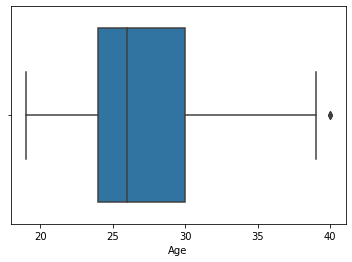

In [21]:
sns.boxplot(x='Age',data=df)

# Using Boxplot

In [22]:
#calculation of quartiles for removal of outliers using boxplot

q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [23]:
upper,lower

(39.0, 15.0)

In [24]:
#created new dataframe of outliers

outliers_boxplot = df[(df['Age'] < lower) | (df['Age'] > upper)]
outliers_boxplot

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
298,Tim Duncan,San Antonio Spurs,21,C,40,6-11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24,PG,40,6-3,200.0,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21,PF,40,6-11,240.0,Kentucky,8500000.0


In [25]:
#removed the outliers

without_outliers_boxplot = df[~((df['Age'] < lower) | (df['Age'] > upper))]
without_outliers_boxplot

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231.0,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234.0,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203.0,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179.0,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256.0,Kentucky,2.900000e+06


<Axes: xlabel='Age'>

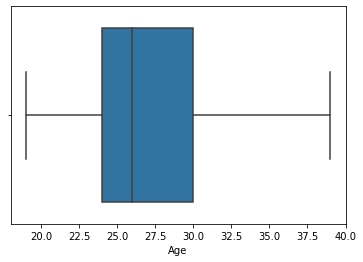

In [26]:
#boxplot without outliers

sns.boxplot(x='Age', data =without_outliers_boxplot)

# Using Z-score

In [30]:
m1=df['Age'].mean()
stdev=df['Age'].std()
df_z=df #df_z to preserve the original dataframe (df)
df_z['Age_z']=(df_z['Age']-m1)/stdev
df_z[(df_z['Age_z'] < -3) | (df_z['Age_z'] > 3)]

In [28]:
df_z

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_z
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180.0,Texas,7.730337e+06,-0.440219
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235.0,Marquette,6.796117e+06,-0.440219
2,John Holland,Boston Celtics,30,SG,27,6-5,205.0,Boston University,4.842684e+06,0.013912
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185.0,Georgia State,1.148640e+06,-1.121415
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231.0,Kentucky,5.000000e+06,0.468043
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234.0,Kentucky,2.239800e+06,-1.575546
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203.0,Butler,2.433333e+06,-0.213153
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179.0,Kentucky,9.000000e+05,-0.667284
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256.0,Kentucky,2.900000e+06,-0.213153


<Axes: xlabel='Age_z'>

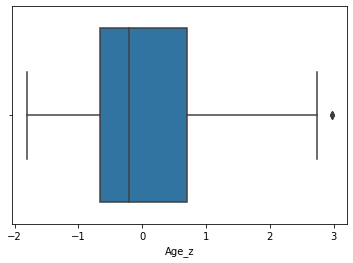

In [31]:
sns.boxplot(data=df, x='Age_z')